# Проект e-learning

1. Сколько студентов успешно сдали только один курс?
2. Выяви самый сложный и самый простой экзамен.
3. По каждому предмету определи средний срок сдачи экзаменов.
4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим. оттоком (ТОП-3).
5. В период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.
6. Построй адаптированные RFM-кластеры студентов, чтобы качественно оценить аудиторию.

## Оглавление
* [1. Открываем файлы, изучаем данные](#h1)
* [2. Подготовка данных](#h2)
* [3. Анализ](#h3)
  * [3.1 Сколько студентов успешно сдали только один курс?](#h3.1)
  * [3.2 Выяви самый сложный и самый простой экзамен.](#h3.2)
  * [3.3 По каждому предмету определи средний срок сдачи экзаменов](#h3.3)

In [27]:
import pandas as pd
import seaborn as sns

<a class="anchor" id="h1"></a>

<br/><br/>
<br/><br/>

# 1. Открываем файлы и изучаем данные   

assessment - Этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).

In [4]:
assessment = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/T0bdjAcKRkfEBQ')

courses - файл содержит список предметов по семестрам

In [5]:
courses = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/15FYKxAj24mASg')

studentAssessment — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.

In [10]:
student_assessment = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/6FVjUJXls-vSPw')

studentRegistration — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.

In [203]:
student_registration = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/WTaSoYJmBTft-Q')





## Изучим информацию об оценках в тестах

code_module — идентификационный код предмета.

code_presentation — семестр (Идентификационный код).

id_assessment — тест (Идентификационный номер ассессмента).

assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

In [146]:
assessment.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [147]:
assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


У `11` тестов нет окончательной даты сдачи

## Изучим список предметов по семестрам

code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код).

module_presentation_length — продолжительность семестра в днях.

In [148]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [334]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


## Изучим  результаты тестов студентов

id_assessment — тест (идентификационный номер).

id_student — идентификационный номер студента.

date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

In [150]:
student_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float32
 5   successfully    173912 non-null  int64  
dtypes: float32(1), int64(5)
memory usage: 7.3 MB


В поле `score` есть пропущеные значения, так же его можно перевести в целое число  

In [151]:
student_assessment.nunique()

id_assessment       188
id_student        23369
date_submitted      312
is_banked             2
score               101
successfully          2
dtype: int64

`23369` студентов принимали участие в тестах

In [152]:
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score,successfully
0,1752,11391,18,0,78.0,1
1,1752,28400,22,0,70.0,1
2,1752,31604,17,0,72.0,1
3,1752,32885,26,0,69.0,1
4,1752,38053,19,0,79.0,1


In [153]:
student_assessment.dtypes

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float32
successfully        int64
dtype: object

Посмотри на распределение дней от начала симестра до сдачи теста студентом

<AxesSubplot:xlabel='date_submitted', ylabel='Count'>

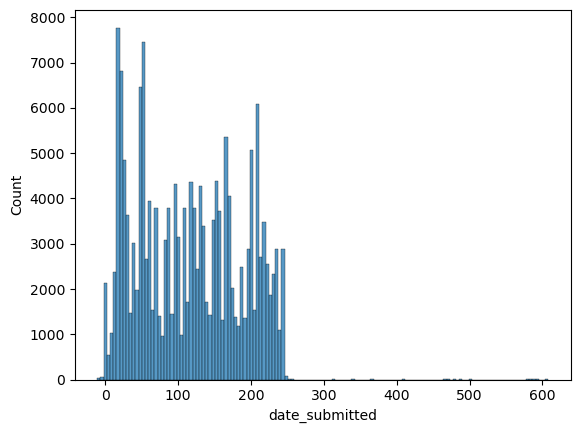

In [154]:
sns.histplot(student_assessment.date_submitted)

У нас есть записи о том что некоторые студенты сдали тест еще до начала симестра.\
Так же есть хвост доходящий до `~ 600` c начала симестра 

<br/><br/>

Посмотри на распределение оценок

<AxesSubplot:xlabel='score', ylabel='Count'>

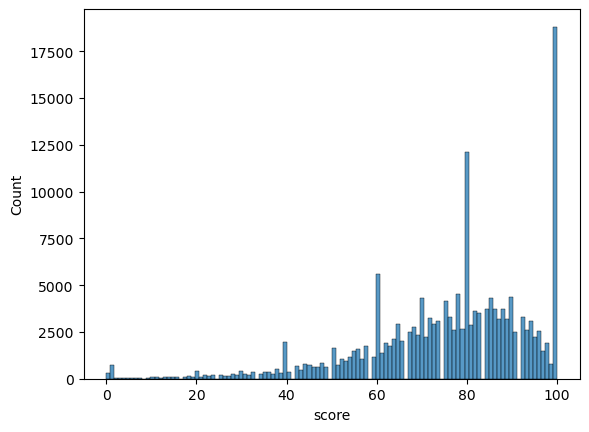

In [155]:
sns.histplot(student_assessment.score)

In [156]:
student_assessment.score.median()

80.0

In [157]:
student_assessment.query('score >= 80')['id_student'].count()

87670

In [158]:
student_assessment.query('40 <= score < 80')['id_student'].count()

78491

In [159]:
student_assessment.query('score < 40')['id_student'].count()

7578

`87670` - тестов было сдано на оценку 80 и более \
`78491` - тестов было сдано на отценку от 40 до 79\
`7578` - тестов было не сданы

## Изчучем время регестрации студентов на курс в семестре

code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код)

id_student — идентификационный номер студента.

date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

In [160]:
student_registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [161]:
student_registration.nunique()

code_module                7
code_presentation          4
id_student             28785
date_registration        332
date_unregistration      416
dtype: int64

In [162]:
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


<AxesSubplot:xlabel='date_registration', ylabel='Count'>

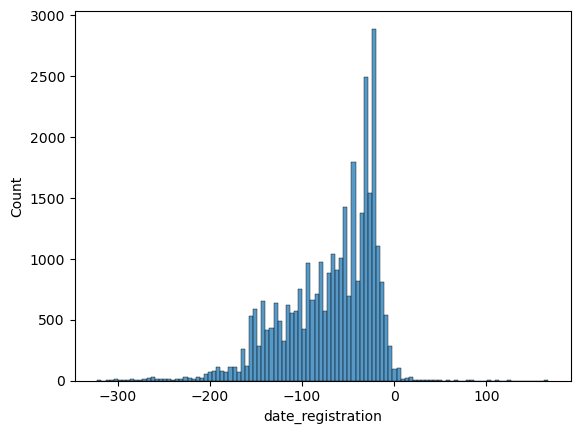

In [163]:
sns.histplot(student_registration.date_registration)

Есть студенты которые записались на курс за долго после его начала

<a class="anchor" id="h2"></a>

<br/><br/>
<br/><br/>
# 2. Подготовка данных

Добавля новое поле в таблицу с результатами тестов, которое будет сообщать успешло ли сдан тест

In [205]:
student_assessment['successfully'] = student_assessment.score.apply(lambda x: x >= 40)*1

В таблице регестрации заменю пропущеные значения в поле `date_unregistration` на `0`

In [206]:
student_registration.date_unregistration = student_registration.date_unregistration.fillna(0)

Проверим по всем ли предметам студенты сдавали экзамены

In [348]:
assessment.query('assessment_type == "Exam" and id_assessment in @student_assessment.id_assessment')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
62,CCC,2014B,24290,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
87,DDD,2013B,25340,Exam,240.0,100.0
94,DDD,2013J,25354,Exam,261.0,100.0
101,DDD,2014B,25361,Exam,241.0,100.0
108,DDD,2014J,25368,Exam,NaN,100.0


<a class="anchor" id="h3"></a>

<br/><br/>
<br/><br/>
# 3. Анализ

<a class="anchor" id="h3.1"></a>
### 3.1 Сколько студентов успешно сдали только один курс?

In [351]:
id_assessment_exam = assessment.query('assessment_type == "Exam"')['id_assessment']

In [350]:
student_assessment.query('id_assessment in @id_assessment_exam').groupby('id_student',as_index = False)\
    .agg({'successfully':'sum'}).groupby('successfully').agg({'id_student':'count'}).reset_index()

,successfully,id_student
0,0,536
1,1,3802
2,2,295


In [212]:
student_assessment.query('id_assessment in @id_assessment_exam and successfully == 1')\
    .groupby('id_student',as_index = False).agg({'id_assessment':'nunique'})\
    .groupby('id_assessment').agg({'id_student':'count'}).reset_index()

,id_assessment,id_student
0,1,3802
1,2,295


<a class="anchor" id="h3.2"></a>
### 3.2 Выяви самый сложный и самый простой экзамен.

In [309]:
student_assessment_exam = student_assessment.query('id_assessment in @id_assessment_exam')

In [314]:
finalizability = round(student_assessment_exam.groupby('id_assessment').successfully.mean()*100,2).reset_index().\
    rename(columns = {'successfully':'finalizability'})

In [315]:
assessment.query('id_assessment in @finalizability.id_assessment').merge(g).sort_values('finalizability')\
    .reset_index(drop = True)\
    .style.highlight_min('finalizability').highlight_max('finalizability')

,code_module,code_presentation,id_assessment,assessment_type,date,weight,finalizability
0,DDD,2013B,25340,Exam,240.000000,100.000000,83.720000
1,CCC,2014J,24299,Exam,nan,100.000000,87.240000
2,DDD,2014J,25368,Exam,nan,100.000000,88.630000
3,CCC,2014B,24290,Exam,nan,100.000000,88.890000
4,DDD,2013J,25354,Exam,261.000000,100.000000,90.700000
5,DDD,2014B,25361,Exam,241.000000,100.000000,92.560000


Самый сложный экзамен `25340` оказался у курса `DDD 2013B` и имеет завершаемость `83.72%`\
Самый легкий экзамен `25361` оказался у курса `DDD 2014B` и имеет завершаемость `92.56%`

<a class="anchor" id="h3.3"></a>
### 3.3 По каждому предмету определи средний срок сдачи `экзаменов`

In [376]:
student_assessment.query('id_assessment in @id_assessment_exam')\
    .merge(assessment[['id_assessment','code_module','code_presentation']],\
    on = 'id_assessment').query('is_banked == 0 and successfully == 1').sort_values('date_submitted')\
    .drop_duplicates(keep='last')\
    .groupby(['code_module','code_presentation']).agg({'date_submitted':'mean'}).reset_index()

,code_module,code_presentation,date_submitted
0,CCC,2014B,231.581325
1,CCC,2014J,244.404318
2,DDD,2013B,230.164683
3,DDD,2013J,239.509112
4,DDD,2014B,234.936082
5,DDD,2014J,242.804038


<a class="anchor" id="h3.4"></a>
### 3.4 Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим. оттоком (ТОП-3).

Будем учитывать все регестрации не зависимо от того была ли отмена.\
Чтобы учесть что студент может поступить на тот же предмет но в другой семестр, сначала посчитаю кол-во уникальных регестраций по семетрам, далее сложу результат сгруппировав по предмету

In [399]:
student_registration\
    .groupby(['code_module','code_presentation'], as_index = False).agg({'id_student':'nunique'})\
    .groupby('code_module')['id_student'].agg(['sum']).reset_index().sort_values('sum', ascending = False)

,code_module,sum
1,BBB,7909
5,FFF,7762
3,DDD,6272
2,CCC,4434
4,EEE,2934
6,GGG,2534
0,AAA,748


In [386]:
student_registration

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,0.0
1,AAA,2013J,28400,-53.0,0.0
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,0.0
4,AAA,2013J,32885,-176.0,0.0
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,0.0
32589,GGG,2014J,2645731,-23.0,0.0
32590,GGG,2014J,2648187,-129.0,0.0
32591,GGG,2014J,2679821,-49.0,101.0


In [384]:
student_registration.query('date_unregistration != 0').groupby('code_module')\
    .agg({'id_student':'nunique'}).sort_values('id_student')

,id_student
code_module,
AAA,116
GGG,284
EEE,643
CCC,1823
DDD,1988
FFF,2133
BBB,2184
